# NLP - text classification
Training using [Emotions dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

## Import packages

In [1]:
!python --version

Python 3.11.9


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

print("NumPy version: ", np.__version__)
print("Tensorflow Version",tf.__version__)

2024-08-12 22:34:52.624459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 22:34:53.549493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NumPy version:  1.26.4
Tensorflow Version 2.16.1


## Data preprocess

In [3]:
df_train = pd.read_csv("dataset/train.txt",
                 delimiter=';', header=None, names=['sentence','label'])

df_valid = pd.read_csv("dataset/val.txt",
                 delimiter=';', header=None, names=['sentence','label'])

df_test  = pd.read_csv("dataset/test.txt",
                 delimiter=';', header=None, names=['sentence','label'])

df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.label.value_counts()

label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [5]:
df_train = df_train[~df_train['label'].str.contains('love')]
df_train = df_train[~df_train['label'].str.contains('surprise')]

df_train.label.value_counts()

label
joy        5362
sadness    4666
anger      2159
fear       1937
Name: count, dtype: int64

In [6]:
df_valid = df_valid[~df_valid['label'].str.contains('love')]
df_valid = df_valid[~df_valid['label'].str.contains('surprise')]

df_test = df_test[~df_test['label'].str.contains('love')]
df_test = df_test[~df_test['label'].str.contains('surprise')]

In [7]:
emotion_categories = len(df_train.label.unique())
emotion_categories

4

split into X, y

In [8]:
train_txt = df_train['sentence']
train_label = df_train['label']

valid_txt = df_valid['sentence']
valid_label = df_valid['label']

test_txt = df_test['sentence']
test_label = df_test['label']

In [9]:
train_txt.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
4                                 i am feeling grouchy
5    ive been feeling a little burdened lately wasn...
Name: sentence, dtype: object

In [10]:
from text_preprocess import preprocess_text

train_txt.apply(lambda x: preprocess_text(x, do_stem=True)).head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/physics/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                    didnt feel humili
1    go feel hopeless damn hope around someon care ...
2                 im grab minut post feel greedi wrong
4                                         feel grouchi
5            ive feel littl burden late wasnt sure whi
Name: sentence, dtype: object

In [11]:
train_txt = train_txt.apply(lambda x: preprocess_text(x, do_stem=True))
valid_txt = valid_txt.apply(lambda x: preprocess_text(x, do_stem=True))
test_txt  = test_txt.apply(lambda x: preprocess_text(x, do_stem=True))

In [12]:
encoder = LabelEncoder()
train_label = encoder.fit_transform(train_label)
valid_label = encoder.transform(valid_label)
test_label = encoder.transform(test_label)

train_label[:5], valid_label[:5], test_label[:5]

(array([3, 3, 0, 0, 3]), array([3, 3, 0, 2, 2]), array([3, 3, 3, 2, 3]))

In [13]:
train_y = to_categorical(train_label)
valid_y = to_categorical(valid_label)
test_y = to_categorical(test_label)

In [14]:
## Stop Block ##

## Bag of words + DNN

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_txt)
tokenizer.word_index

tokenizer.texts_to_matrix(train_txt, mode='count')


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
train_X = tokenizer.texts_to_matrix(train_txt, mode='count')
valid_X = tokenizer.texts_to_matrix(valid_txt, mode='count')
test_X  = tokenizer.texts_to_matrix(test_txt, mode='count')

In [17]:
train_X.shape, valid_X.shape, test_X.shape

((14124, 9531), (1741, 9531), (1775, 9531))

In [18]:
from nlp_model import nlp_dnn

model = nlp_dnn((train_X.shape[1],), emotion_categories)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/physics/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-12 22:35:02.166201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-12 22:35:02.342859: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       610,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,260 (2.34 MB)

 Trainable params: 612,260 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=10, batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5468 - loss: 1.0777 - val_accuracy: 0.8845 - val_loss: 0.3681
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9293 - loss: 0.2343 - val_accuracy: 0.8932 - val_loss: 0.3136
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9671 - loss: 0.1106 - val_accuracy: 0.8909 - val_loss: 0.3526
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0747 - val_accuracy: 0.8914 - val_loss: 0.3886
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.8857 - val_loss: 0.4452
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8870 - loss: 0.4128
Test Loss: 0.40749359130859375
Test Accuracy: 0.8867605924606323


With bag of words, each input is a 9531-dimension vector. The test accuracy is 0.89.

In [20]:
## Stop Block ##

## Analyze texts with padding sequences + Recurrent models

In [21]:
max_sentence_len = 0
for sentence in train_txt:
    max_sentence_len = max(max_sentence_len, len(sentence.split()))

max_sentence_len

36

Median sentence length: 9.0
Quartiles: [ 5.  9. 13.]


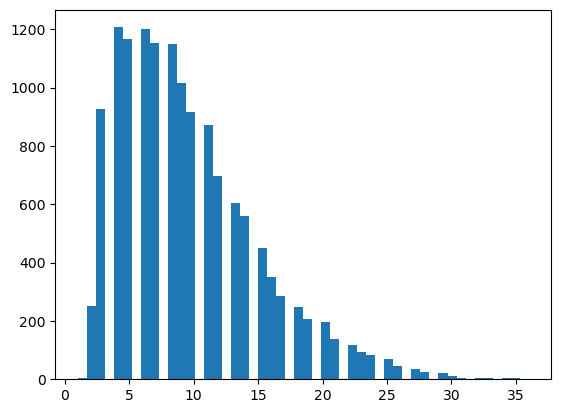

In [22]:
# collect statistics of sentence length
sentences_len = np.array([len(sentence.split()) for sentence in train_txt])
# find median, plot histogram
median_len = np.median(sentences_len)
quartiles = np.quantile(sentences_len, [0.25, 0.5, 0.75])
print("Median sentence length:", median_len)
print("Quartiles:", quartiles)
_ = plt.hist(sentences_len, bins=50)

This statistics results show that it might be not be efficient enough to use maximum sentence length to pad sequences. However, we will still use max_sentence_len for now.

In [24]:
max_words = 10000
# pad_size = max_sentence_len

In [25]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_txt)

In [26]:
num_words = len(tokenizer.word_index) + 1
print(num_words)
for i in range(5):
    key = list(tokenizer.word_index.keys())[i]
    print(key, tokenizer.word_index[key])

9531
feel 1
like 2
im 3
not 4
becaus 5


### word2vec

In [27]:
from text_preprocess import text2sentences

train_sentences = text2sentences(train_txt)
train_sentences[:4]

[['didnt', 'feel', 'humili'],
 ['go',
  'feel',
  'hopeless',
  'damn',
  'hope',
  'around',
  'someon',
  'care',
  'awak'],
 ['im', 'grab', 'minut', 'post', 'feel', 'greedi', 'wrong'],
 ['feel', 'grouchi']]

In [28]:
from gensim.models import Word2Vec

# Training the model
model_w2v = Word2Vec(train_sentences, vector_size=50, window=4, min_count=1, workers=8)

# Finding similar words
similar_words = model_w2v.wv.most_similar('feel')
print(similar_words)
word_vector = model_w2v.wv['feel']
print(f"Vector for 'feel': {word_vector}")

[('sure', 0.9847540855407715), ('topic', 0.983769953250885), ('go', 0.9833862781524658), ('person', 0.9828078150749207), ('punish', 0.9819080233573914), ('chose', 0.9815338253974915), ('belli', 0.9814921021461487), ('cant', 0.9814298748970032), ('smart', 0.9812914133071899), ('right', 0.9812730550765991)]
Vector for 'feel': [-0.25207177  0.14792788  0.25043026  0.80379325 -0.82181364 -0.995705
  1.1619874   1.5975789  -1.1887304  -0.6378109   0.3495718  -1.0352572
  0.2585926   0.49965    -1.0612639   0.04673853  0.48523158  0.07277071
 -1.1791193  -0.8577896   0.15427719  1.1585777   0.80794066 -0.47041196
  0.9142356   0.6315526  -0.4213455  -0.20390348 -0.91531575  0.05932346
  0.07668488 -0.37411842 -0.04302233 -0.3458213  -0.4603439   0.8547294
  0.7553368  -0.27786133  0.5301382  -0.84895873  0.2486916   0.6604347
  0.07514174  0.12339656  1.2313205   0.5499689  -0.17516132 -0.0260135
  0.17627525  0.3705529 ]


In [29]:
model_w2v.vector_size

50

In [31]:
from text_preprocess import get_embeddingdict_w2v

embedding_dict = get_embeddingdict_w2v(tokenizer, model_w2v)
embedding_dict

{'input_dim': 9531,
 'output_dim': 50,
 'weights': [array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-2.52071768e-01,  1.47927880e-01,  2.50430256e-01, ...,
          -2.60134954e-02,  1.76275253e-01,  3.70552897e-01],
         [-2.37250596e-01, -4.51893881e-02,  1.47369623e-01, ...,
          -5.15173197e-01,  9.71006379e-02,  2.46713877e-01],
         ...,
         [-2.51545012e-02,  5.55335032e-03,  2.25344822e-02, ...,
           9.17060825e-04, -1.04980888e-02,  7.98362494e-03],
         [-2.55546503e-04,  1.55271105e-02,  1.60005186e-02, ...,
          -9.69555229e-04,  5.65193826e-03, -1.03667509e-02],
         [-3.57144047e-04,  6.53200597e-03, -1.30426856e-02, ...,
          -1.05302166e-02,  9.30283312e-03, -1.03162043e-02]])]}

In [32]:
train_X = pad_sequences(tokenizer.texts_to_sequences(train_txt), maxlen=max_sentence_len, padding='post')

train_X.shape, train_X[:3, :10]

((14124, 36),
 array([[  62,    1,  540,    0,    0,    0,    0,    0,    0,    0],
        [  11,    1,  338,  717,   63,   55,   74,  165, 1016,    0],
        [   3, 1355,  484,  106,    1,  390,  150,    0,    0,    0]],
       dtype=int32))

In [33]:
valid_X = pad_sequences(tokenizer.texts_to_sequences(valid_txt), maxlen=max_sentence_len, padding='post')
test_X = pad_sequences(tokenizer.texts_to_sequences(test_txt), maxlen=max_sentence_len, padding='post')

In [34]:
from nlp_model import nlp_lstm_embedding

model = nlp_lstm_embedding(embedding_dict, emotion_categories)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
# Train the model
history = model.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=10, batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

model.summary()

Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3640 - loss: 1.3087 - val_accuracy: 0.3986 - val_loss: 1.2798
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3805 - loss: 1.2951 - val_accuracy: 0.3647 - val_loss: 1.2855
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3759 - loss: 1.2953 - val_accuracy: 0.4032 - val_loss: 1.2797
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3866 - loss: 1.2876 - val_accuracy: 0.3998 - val_loss: 1.2775
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3810 - loss: 1.2921 - val_accuracy: 0.4044 - val_loss: 1.2778
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3831 - loss: 1.2920 - val_accuracy: 0.4061 - val_loss: 1.2789
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3991 - loss: 1.2788 - val_accuracy: 0.4061 - val_loss: 1.2793


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 36, 50)         │       476,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking (Masking)               │ (None, 36, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 36, 64)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,796 (2.18 MB)

 Trainable params: 31,748 (124.02 KB)

 Non-trainable params: 476,550 (1.82 MB)

 Optimizer params: 63,498 (248.04 KB)

In [36]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3790 - loss: 1.2986
Test Loss: 1.2821530103683472
Test Accuracy: 0.4000000059604645


The accuracy is only a little better than random guessing (0.25) and is definitely not good

### Glove
Use pre-trained [GloVe model](https://nlp.stanford.edu/projects/glove/)

In [37]:
path_to_glove_file = "glove.twitter.27B.50d.txt" # "glove.6B.50d.txt"
# embedding_dim = 50 # can be obtained from GloVe files

In [39]:
from text_preprocess import get_embeddingdict_glove

embedding_dict = get_embeddingdict_glove(tokenizer, path_to_glove_file)

Found 1193514 word vectors.
Converted 7352 words (2178 misses)


In [40]:
# Define the architecture of the RNN
model = nlp_lstm_embedding(embedding_dict, emotion_categories, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])


Training data size:  9531
Embedding dimension:  50


In [41]:
# Train the model
history = model.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=15, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
model.summary()

Epoch 1/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.4440 - f1_score: 0.2504 - loss: 1.2561 - val_accuracy: 0.5250 - val_f1_score: 0.3038 - val_loss: 1.1241
Epoch 2/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5064 - f1_score: 0.3022 - loss: 1.1447 - val_accuracy: 0.5428 - val_f1_score: 0.3628 - val_loss: 1.0669
Epoch 3/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5272 - f1_score: 0.3660 - loss: 1.0928 - val_accuracy: 0.5744 - val_f1_score: 0.4386 - val_loss: 0.9975
Epoch 4/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5709 - f1_score: 0.4473 - loss: 1.0272 - val_accuracy: 0.6215 - val_f1_score: 0.5484 - val_loss: 0.9342
Epoch 5/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5946 - f1_score: 0.5112 - loss: 0.9904 - val_accuracy: 0.6502 - val_f1_score: 0.5908 - val_loss: 0.8818
Epoch 6/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6307 - f1_score: 0.5622 - loss: 0.9188 - val_accuracy: 0.6887 - val_f1_score:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 36, 50)         │       476,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_1 (Masking)             │ (None, 36, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 36, 64)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,796 (2.18 MB)

 Trainable params: 31,748 (124.02 KB)

 Non-trainable params: 476,550 (1.82 MB)

 Optimizer params: 63,498 (248.04 KB)

In [42]:
# Evaluate the model
score = model.evaluate(test_X, test_y, return_dict=True, verbose=1)
print('Test Loss:', score['loss'])
print('Test Accuracy:', score['accuracy'])
print('F1 Score:', score['f1_score'])

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - f1_score: 0.7653 - loss: 0.5712
Test Loss: 0.5643389225006104
Test Accuracy: 0.7915493249893188
F1 Score: tf.Tensor([0.67956984 0.76415086 0.84890103 0.7751036 ], shape=(4,), dtype=float32)


#### Determine of padding size
We compared the results by setting pad_size to max_sentence_len (36) (as shown above) and the third quartile (13) (will be demonstrated below).

In [43]:
quartiles

array([ 5.,  9., 13.])

In [44]:
third_quartile = int(quartiles[2])
space_usage_ratio = third_quartile / max_sentence_len
print(f"Space usage ratio: {space_usage_ratio}")

Space usage ratio: 0.3611111111111111


In [45]:
train_X = pad_sequences(tokenizer.texts_to_sequences(train_txt), maxlen=third_quartile, padding='post')
valid_X = pad_sequences(tokenizer.texts_to_sequences(valid_txt), maxlen=third_quartile, padding='post')
test_X  = pad_sequences(tokenizer.texts_to_sequences(test_txt) , maxlen=third_quartile, padding='post')

In [46]:
# setting the max_len to third quartile and train the model again
model = nlp_lstm_embedding(embedding_dict, emotion_categories, verbose=1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])
# model.summary()


Training data size:  9531
Embedding dimension:  50


In [47]:
# Train the model
history = model.fit(train_X, train_y, validation_data=(valid_X, valid_y), epochs=15, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
model.summary()

Epoch 1/15


221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4337 - f1_score: 0.2527 - loss: 1.2651 - val_accuracy: 0.5325 - val_f1_score: 0.3099 - val_loss: 1.1253
Epoch 2/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5060 - f1_score: 0.3138 - loss: 1.1516 - val_accuracy: 0.5307 - val_f1_score: 0.3285 - val_loss: 1.0682
Epoch 3/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5291 - f1_score: 0.3892 - loss: 1.0979 - val_accuracy: 0.5807 - val_f1_score: 0.4454 - val_loss: 1.0040
Epoch 4/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5616 - f1_score: 0.4617 - loss: 1.0440 - val_accuracy: 0.6221 - val_f1_score: 0.5556 - val_loss: 0.9456
Epoch 5/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5923 - f1_score: 0.5070 - loss: 0.9843 - val_accuracy: 0.6485 - val_f1_score: 0.5669 - val_loss: 0.8882
Epoch 6/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6152 - f1_score: 0.5534 - loss: 0.9528 - val_accuracy: 0.6783 - val_f1_score: 0.6130 - va

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 13, 50)         │       476,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_2 (Masking)             │ (None, 13, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 13, 64)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,796 (2.18 MB)

 Trainable params: 31,748 (124.02 KB)

 Non-trainable params: 476,550 (1.82 MB)

 Optimizer params: 63,498 (248.04 KB)

In [48]:
# Evaluate the model
score = model.evaluate(test_X, test_y, return_dict=True)
print('Test Loss:', score['loss'])
print('Test Accuracy:', score['accuracy'])
print('F1 Score:', score['f1_score'])

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - f1_score: 0.7550 - loss: 0.6081
Test Loss: 0.6105379462242126
Test Accuracy: 0.7735211253166199
F1 Score: tf.Tensor([0.68979585 0.7158836  0.8305555  0.7604433 ], shape=(4,), dtype=float32)


The training input space of using the third quartile of sentences lengths is only 0.36 of that using the maximum of sentences lengths. And it performs similarly well.

In the following sections, we will set padding size to the third quartile.

### Glove + Hyper-parameter tuning

In [49]:
import keras_tuner as kt
from nlp_model import nlp_hyperparam

In [50]:
third_quartile

13

In [51]:
## Hyperparameter tuning
tuner_hb = kt.Hyperband(
    hypermodel=lambda hp: nlp_hyperparam(hp=hp, embedding_dict=embedding_dict, verbose=1), # hypermodel=nlp_hyperparam(embedding_dict=embedding_dict, input_length=third_quartile),
    objective="val_accuracy",
    max_epochs=12,
    factor=3,
    overwrite=True,
    directory="hp_tuning",
    project_name="hyperband",
)

Training data size:  9531
Embedding dimension:  50


In [52]:
tuner = tuner_hb
tuner.search_space_summary()

Search space summary
Default search space size: 4
model_type (Choice)
{'default': 'single_LSTM', 'conditions': [], 'values': ['single_LSTM', 'bidir_LSTM'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}


In [53]:
tuner.search(train_X, train_y, epochs=18, validation_data=(valid_X, valid_y), batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Trial 30 Complete [00h 00m 38s]
val_accuracy: 0.805284321308136

Best val_accuracy So Far: 0.805284321308136
Total elapsed time: 00h 09m 02s


In [54]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Training data size:  9531
Embedding dimension:  50
Training data size:  9531
Embedding dimension:  50


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 13, 50)         │       476,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking (Masking)               │ (None, 13, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 13, 128)        │        58,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,762 (2.42 MB)

 Trainable params: 158,212 (618.02 KB)

 Non-trainable params: 476,550 (1.82 MB)

In [55]:
# # Evaluate the model
# test_loss, test_acc = best_model.evaluate(test_X, test_y)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_acc)

In [56]:
# Evaluate the model
score = best_model.evaluate(test_X, test_y, return_dict=True)
print('Test Loss:', score['loss'])
print('Test Accuracy:', score['accuracy'])
print('F1 Score:', score['f1_score'])

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8019 - f1_score: 0.7866 - loss: 0.5363
Test Loss: 0.5167815685272217
Test Accuracy: 0.8157746195793152
F1 Score: tf.Tensor([0.7549407  0.7860464  0.8662873  0.79304624], shape=(4,), dtype=float32)


In [57]:
# get hyperparameters of the best model
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.values

{'model_type': 'bidir_LSTM',
 'lr': 0.007598629268102825,
 'dropout': 0.1,
 'units': 64,
 'tuner/epochs': 12,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

## Summary
For the bag of words method, the input size of each training data is 9531. Constructing and training the DNN model, we obtain 0.89 accuracy. The accuracy is pretty good, but one of the disadvantages is obvious that it requires too many spaces and is too sparse.

For the padding sequence method with pretrained GloVe word-to-vector model, the input size of each training data is 13 x 50 = 650. Constructing and training the LSTM model, we obtain 0.82 accuracy. Although the accuracy is not better than one from the bag of words method, it requires much less spaces.

